In [1]:
import librosa
import os
import pandas as pd
import numpy as np
import librosa.display
import glob 
import matplotlib.pyplot as plt

In [2]:
data, sampling_rate = librosa.load('43.wav')
print(data,sampling_rate)

[-1.0999241e-06  5.7770660e-07  5.3953761e-07 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] 22050


In [18]:
duration = librosa.get_duration(data,sampling_rate)
duration_ts = librosa.time_to_frames(duration,sr=25000, n_fft = 25)
duration_ts

14760

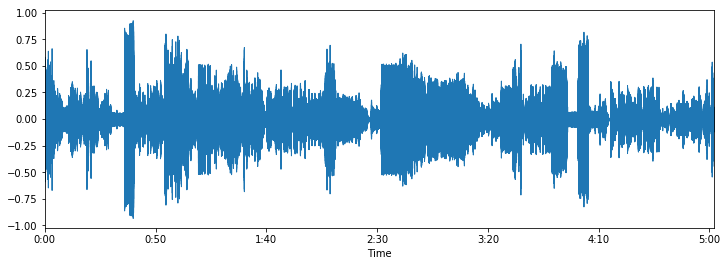

In [19]:
plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, sr=sampling_rate)

In [20]:
def stft(file):
    y, sr = librosa.load(file)
    D = np.abs(librosa.stft(y))
    return D

In [37]:
D = stft("temp.wav")
print(D.shape)

(1025, 173)


In [22]:
def mfcc(file):
    file_name = os.path.abspath(file)


    X, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 

    feature = mfccs
    return feature

In [23]:
mfcc("temp.wav")

array([-186.29367603,  111.83627845,  -47.33582905,   16.29213101,
        -17.44909182,    7.79361295,  -17.64584553,    9.31914494,
        -17.19957092,    3.93794907,  -19.64072024,   -1.09672984,
        -15.50012406,   -1.11800089,  -14.31149317,   -2.2991741 ,
        -13.42496917,   -0.59714894,   -9.99792501,   -3.03355955,
        -11.04443784,   -3.94390515,   -8.02847977,   -4.06594131,
        -10.10975136,   -3.08962662,   -7.57335977,   -5.99072809,
         -9.764758  ,   -4.2451379 ,   -4.85081044,   -4.60657989,
         -6.70401687,   -3.54998004,   -3.68242341,   -4.47835203,
         -4.38141108,   -1.70150799,   -3.76703709,   -4.45810357])

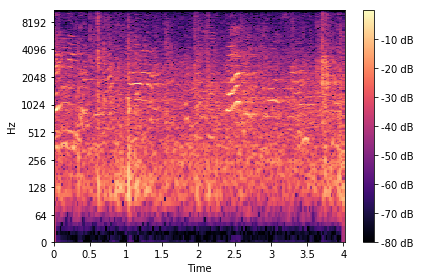

In [24]:
librosa.display.specshow(librosa.amplitude_to_db(D,ref=np.max),y_axis='log', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()

In [25]:
def time_stamp_to_np(file):
    fp = open(file,"r+")
    data = fp.read().split('\n')[:-1]
    data = [float(x) for x in data]
    return np.asarray(data)

In [26]:
time_stamps = time_stamp_to_np("43")

In [32]:
spoken_labeled_ts = librosa.time_to_frames(time_stamps,sr=25000, n_fft = 25)
spoken_labeled_ts

array([  201,  1395,  1965,  2601,  3849,  4331,  4674,  5739,  9262,
        9829, 10044, 10300, 10704, 11742, 11975, 12437, 13317, 14248,
       14554, 14760])

In [35]:
wave_speech_ts = np.zeros(duration_ts+1)
for ts in spoken_labeled_ts:
    wave_speech_ts[ts] = 1
np.savez("ts_wav.npz",wave_speech_ts)